In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from scipy.special import gamma

# Bessel process sampling

Course link: https://www.maths.univ-evry.fr/pages_perso/jeanblanc/conferences/Jordanie.pdf

## Explicit Euler-scheme

This way of implementing is not mathematically stable **[Numerical Probabiliy course at UPMC-X M2 Finance and Probabiliy, Gilles Pagès]**, as the process can become negative, which is forbidden. In practice, the result are pretty often good and this is indeed the way to sample Bessel processes for dimensions $\delta<2$ as the implicit methods gives wrong samples in this case.  

The demonstration of instability of implicit methods in the case $\delta<2$ for the forced implicit method, and in the case of $\delta<1$ for the implicit method by change of variable is given by **[Ikeda-Watanabe, 1981]**.

We recall that a Bessel process eventually comes back to 0 with probability 1 if $\delta<1$, and never comes back to 0 if $\delta>=2$. So the case $\delta>=2$ is totally irrelevant for us.

In [2]:
def explicit_bessel(delta, n):
  """
    Bessel process sampling between time [0,1], dimension delta, n points
    Using explicit Euler scheme
  """
  traj = np.zeros(n)
  w = np.random.normal(scale=1/np.sqrt(n), size=n)
  for i in range(1,n):
    traj[i] = traj[i-1] + delta/n + 2*np.sqrt(abs(traj[i-1]))*w[i-1]
  return np.sqrt(abs(traj))

Number of points of the trajectory below 0.1: 8473


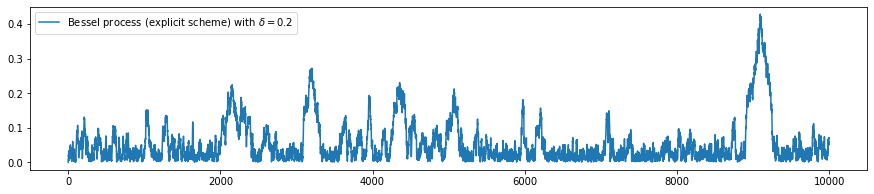

In [24]:
delta = 0.2
n = 10000
traj = explicit_bessel(delta, n)

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Bessel process (explicit scheme) with $\delta=$"+str(delta))
_ = plt.legend()

Number of points of the trajectory below 0.1: 3355


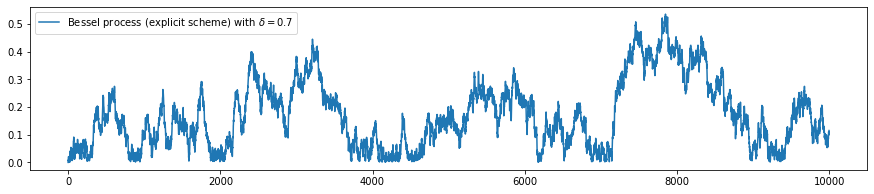

In [25]:
delta = 0.7
n = 10000
traj = explicit_bessel(delta, n)

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Bessel process (explicit scheme) with $\delta=$"+str(delta))
_ = plt.legend()

Number of points of the trajectory below 0.1: 1960


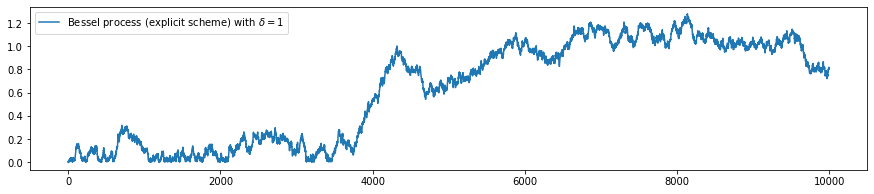

In [31]:
# Norm of a Brownian motion
delta = 1
n = 10000
traj = explicit_bessel(delta, n)

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Bessel process (explicit scheme) with $\delta=$"+str(delta))
_ = plt.legend()

Number of points of the trajectory below 0.1: 1781


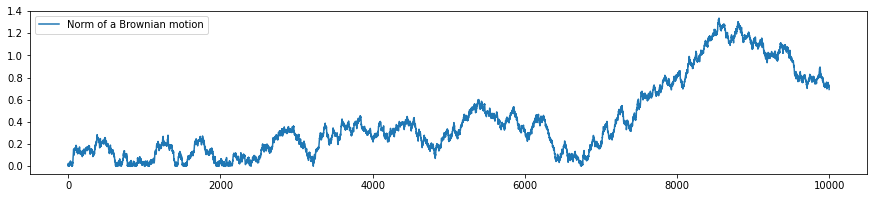

In [37]:
# Comparison with the exact case of a norm of a Brownian motion
traj = abs(np.cumsum(np.random.normal(scale=1/np.sqrt(n), size=n)))

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Norm of a Brownian motion")
_ = plt.legend()

Number of points of the trajectory below 0.1: 945


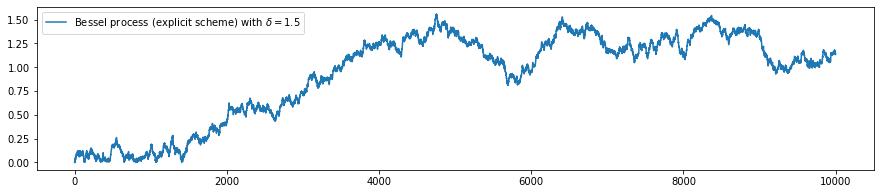

In [38]:
delta = 1.5
n = 10000
traj = explicit_bessel(delta, n)

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Bessel process (explicit scheme) with $\delta=$"+str(delta))
_ = plt.legend()

Number of points of the trajectory below 0.1: 180


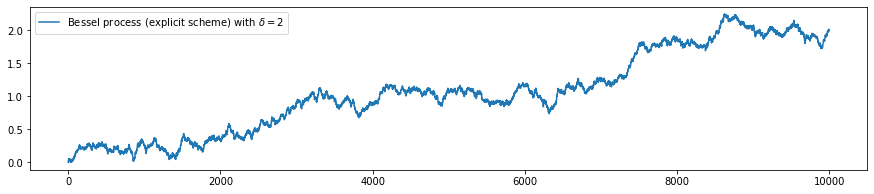

In [44]:
# Theoretical limit of delta from which the proba of hitting 0 after the initialization in the trajectory is 0
delta = 2
n = 10000
traj = explicit_bessel(delta, n)

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Bessel process (explicit scheme) with $\delta=$"+str(delta))
_ = plt.legend()

Number of points of the trajectory below 0.1: 48


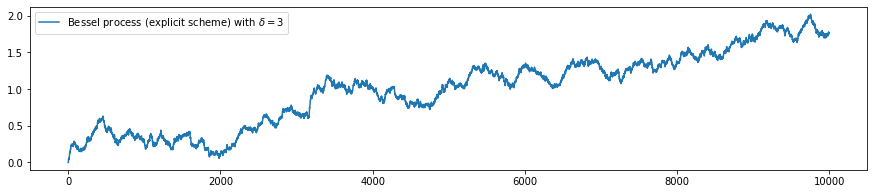

In [45]:
# Theoretical limit of delta from which the proba of hitting 0 after the initialization in the trajectory is 0
delta = 3
n = 10000
traj = explicit_bessel(delta, n)

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Bessel process (explicit scheme) with $\delta=$"+str(delta))
_ = plt.legend()

As expected, the more the dimension grows, the less excursions around 0 there are. The theoretical limit of $\delta=2$ from which the proba of hitting again 0 is null is well illustrated here.

## Forced implicit Euler-scheme

With the implicit scheme, the process cannot become negative. However, this does not ensure stability. Indeed, the demonstration of instability of implicit methods in the case $\delta<2$ for the forced implicit method is given by **[Ikeda-Watanabe, 1981]**.

In [5]:
def implicit_bessel(delta, n):
  """
    Bessel process sampling between time [0,1], dimension delta, n points
    Using explicit Euler scheme
  """
  traj = np.zeros(n)
  w = np.random.normal(scale=1/np.sqrt(n), size=n)
  for i in range(1,n):
    traj[i] = (w[i] + np.sqrt(w[i]**2 + delta/n + traj[i-1]))**2
  return np.sqrt(abs(traj))

Number of points of the trajectory below 0.1: 79


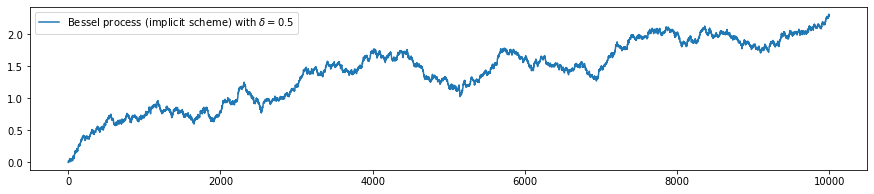

In [14]:
delta = 0.5
n = 10000
traj = implicit_bessel(delta, n)

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Bessel process (implicit scheme) with $\delta=$"+str(delta))
_ = plt.legend()

Number of points of the trajectory below 0.1: 77


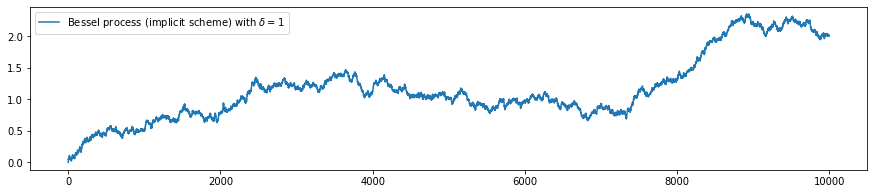

In [15]:
delta = 1
n = 10000
traj = implicit_bessel(delta, n)

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Bessel process (implicit scheme) with $\delta=$"+str(delta))
_ = plt.legend()

Number of points of the trajectory below 0.1: 1976


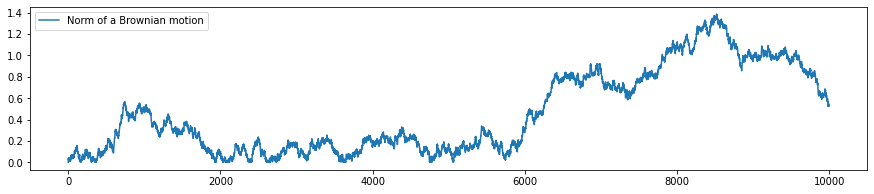

In [49]:
# Comparison with the exact case of a norm of a Brownian motion
traj = abs(np.cumsum(np.random.normal(scale=1/np.sqrt(n), size=n)))

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Norm of a Brownian motion")
_ = plt.legend()

The comparison with the Euclidean norm of a Brownian motion, which is strictly equivalent to a Bessel process of dimension 1, shows the unstability of the implicit scheme in the case of $\delta \in ]0,2[$, looking much more like trajectory of dimension $\delta >= 2$, which do not come back to 0.

Number of points of the trajectory below 0.1: 29


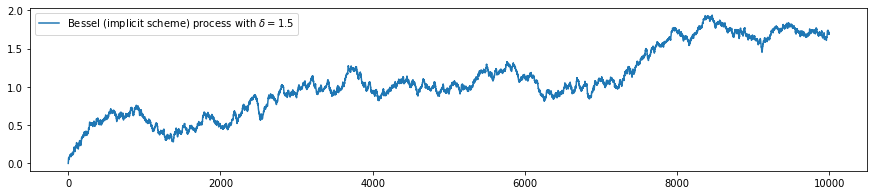

In [16]:
delta = 1.5
n = 10000
traj = implicit_bessel(delta, n)

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Bessel (implicit scheme) process with $\delta=$"+str(delta))
_ = plt.legend()

Number of points of the trajectory below 0.1: 13


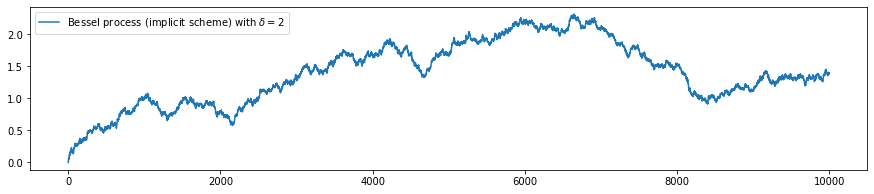

In [17]:
delta = 2
n = 10000
traj = implicit_bessel(delta, n)

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Bessel process (implicit scheme) with $\delta=$"+str(delta))
_ = plt.legend()

We remark that even for dimensions $\delta < 2$, the trajectory never comes back to 0, looking like trajectory of dimension $\delta=2$ sampled with the explicit scheme. Mathematically, the hits of zeros has to be much more frequent, which experimentally confirms the unstability and the unusability of such scheme for sampling with $\delta \in ]0,2[$.

# Excursion length sorting

In [3]:
def excursion_lengths(traj, thr=1e-1):
  n = traj.shape[0]
  len_distrib = np.zeros(n)
  zeros = traj<thr
  zeros_ind = (np.cumsum(np.ones(n))-1)[zeros]
  lengths = zeros_ind[1:] - zeros_ind[:-1]
  for i in range(len(lengths)):
    len_distrib[int(lengths[i])] += 1
  return len_distrib

## Cluster length distribution

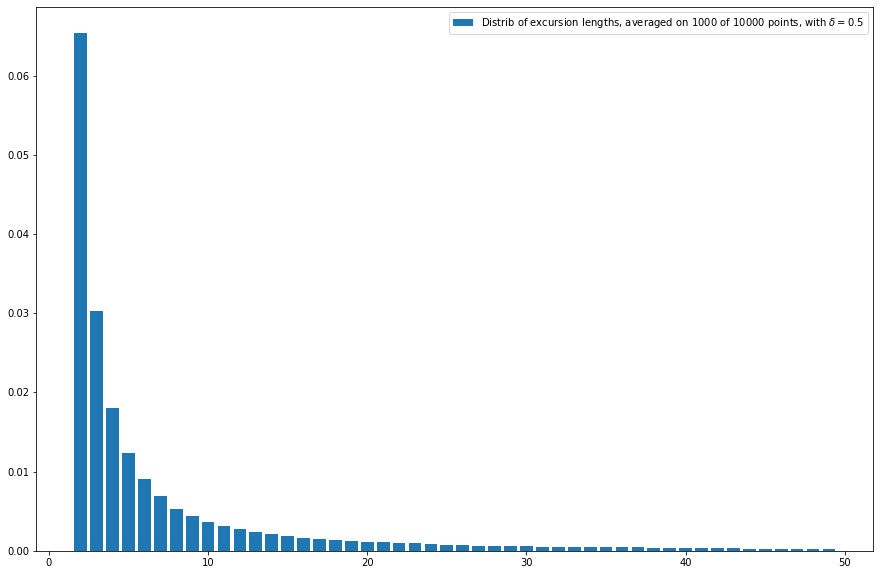

In [ ]:
delta = 0.5
n = 10000
n_trajs = 1000
thr = 2e-2

# Warning on the clusters of size 1, they are more than there should be, due to the discretization of the trajectory (cluster of size 1 contains many excursions of size strictly below too that shouldn't be there), and threshold to detect 0
min_cluster = 1
max_cluster = 50

len_distrib = np.zeros(n)
for i in range(n_trajs):
  traj = explicit_bessel(delta, n)
  len_distrib += excursion_lengths(traj, thr=thr)
len_distrib /= n_trajs
len_distrib /= len_distrib.sum()

fig, ax = plt.subplots(figsize=(15,10))
ax.bar(np.arange(min_cluster,max_cluster), len_distrib[min_cluster:max_cluster], label="Distrib of excursion lengths, averaged on "+str(n_trajs)"trajs of "+str(n)+" points, with $\delta=$"+str(delta))
_ = plt.legend()

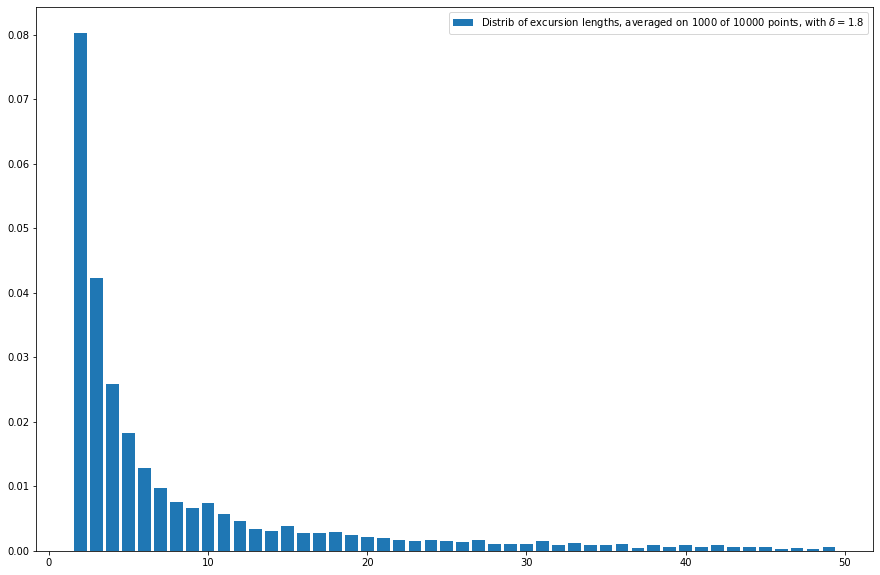

In [ ]:
delta = 1.8
n = 10000
n_trajs = 1000
thr = 2e-2

# Warning on the clusters of size 1, they are more than there should be, due to the discretization of the trajectory (cluster of size 1 contains many excursions of size strictly below too that shouldn't be there), and threshold to detect 0
min_cluster = 1
max_cluster = 50

len_distrib = np.zeros(n)
for i in range(n_trajs):
  traj = explicit_bessel(delta, n)
  len_distrib += excursion_lengths(traj, thr=thr)
len_distrib /= n_trajs
len_distrib /= len_distrib.sum()


fig, ax = plt.subplots(figsize=(15,10))
ax.bar(np.arange(min_cluster,max_cluster), len_distrib[min_cluster:max_cluster], label="Distrib of excursion lengths, averaged on "+str(n_trajs)+"trajs of "+str(n)+" points, with $\delta=$"+str(delta))
_ = plt.legend()

## Evolution of the number of clusters

### Threshold and discretization sensitivity

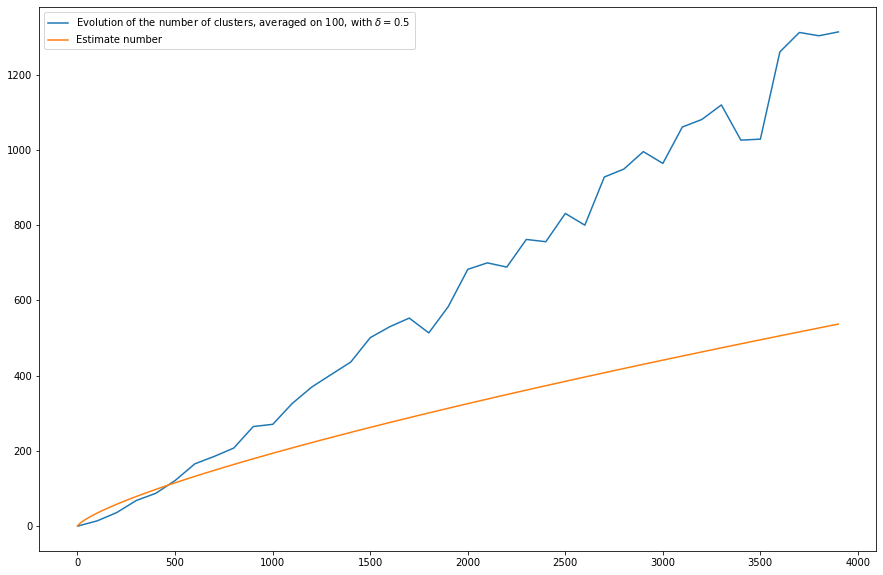

In [4]:
delta = 0.5 # delta = 2*(1-alpha) ie alpha = 3/4
alpha = 1-delta/2
n_trajs = 100
n_tab = np.arange(1,4000,100)
thr = 1e-1

nb_clusters = np.zeros(len(n_tab))
for i in range(len(n_tab)):
  for j in range(n_trajs):
    traj = explicit_bessel(delta, n_tab[i])
    nb_clusters[i] += excursion_lengths(traj, thr=thr)[1:].sum() 
nb_clusters /= n_trajs

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.array(n_tab), nb_clusters, label="Evolution of the number of clusters, averaged on "+str(n_trajs)+", with $\delta=$"+str(delta))
ax.plot(np.arange(n_tab[-1]), np.arange(n_tab[-1])**alpha/alpha/gamma(alpha), label="Estimate number")
_ = plt.legend()

The clusters of size 1 is too large, dur the combination of time discretization and thresholding. Let's show the evolution with only clusters of size 2 or more.

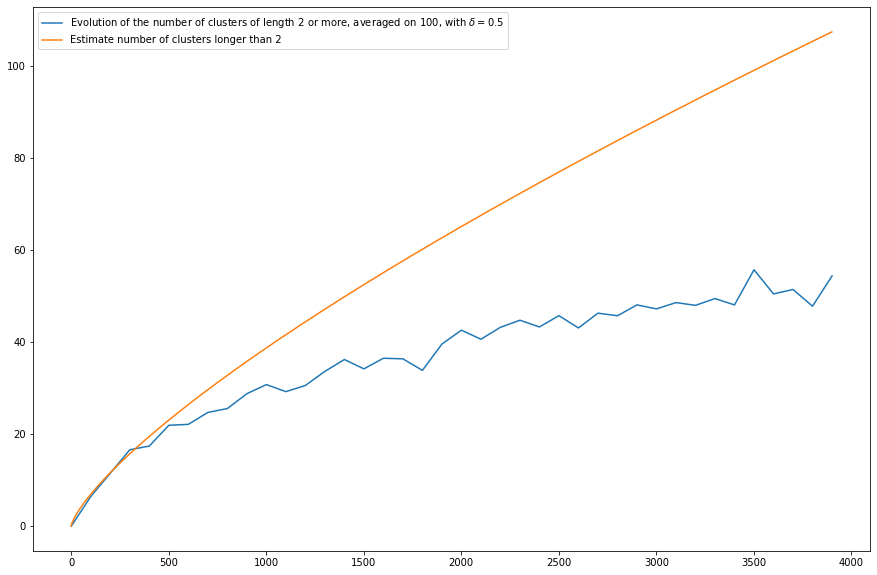

In [5]:
delta = 0.5 # delta = 2*(1-alpha) ie alpha = 3/4
alpha = 1-delta/2
n_trajs = 100
n_tab = np.arange(1,4000,100)
thr = 1e-1

nb_clusters = np.zeros(len(n_tab))
for i in range(len(n_tab)):
  for j in range(n_trajs):
    traj = explicit_bessel(delta, n_tab[i])
    nb_clusters[i] += excursion_lengths(traj, thr=thr)[2:].sum() # Discard the clusters of length 1, they are more than there should be, due to the discretization of the trajectory (cluster of size 1 contains many excursions of size strictly below too that shouldn't be there), and threshold to detect 0
nb_clusters /= n_trajs

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.array(n_tab), nb_clusters, label="Evolution of the number of clusters of length 2 or more, averaged on "+str(n_trajs)+", with $\delta=$"+str(delta))
ax.plot(np.arange(n_tab[-1]), np.arange(n_tab[-1])**alpha/alpha/gamma(alpha)/5, label="Estimate number of clusters longer than 2")
_ = plt.legend()

For longer clusters, the discretization has an other effet: when high excursions are detected, representing 1 cluster, there is a non-negligeable probability that the process indeed hits 0 within this interval, meaning that in reality this excursion is in fact 2 smaller ones. This results in diminishing the final amount of clusters, as the plot above can show.

Conclusion : The threshold and the discretization make this way of sampling particularly note conveniant numerically-speaking.

### Special case $\delta=1$

Let's focus on the special case $\delta=1$ where the Bessel process is a 1-D Brownian motion, which will be easier to manipulate, as we can detect 0-hits by change of sign.

In [ ]:
def brownian_excursion_lengths(traj):
  n = traj.shape[0]
  len_distrib = np.zeros(n)
  zeros = np.append(traj[1:]*traj[:-1]<=0, False)
  zeros_ind = (np.cumsum(np.ones(n))-1)[zeros]
  lengths = zeros_ind[1:] - zeros_ind[:-1]
  for i in range(len(lengths)):
    len_distrib[int(lengths[i])] += 1
  return len_distrib

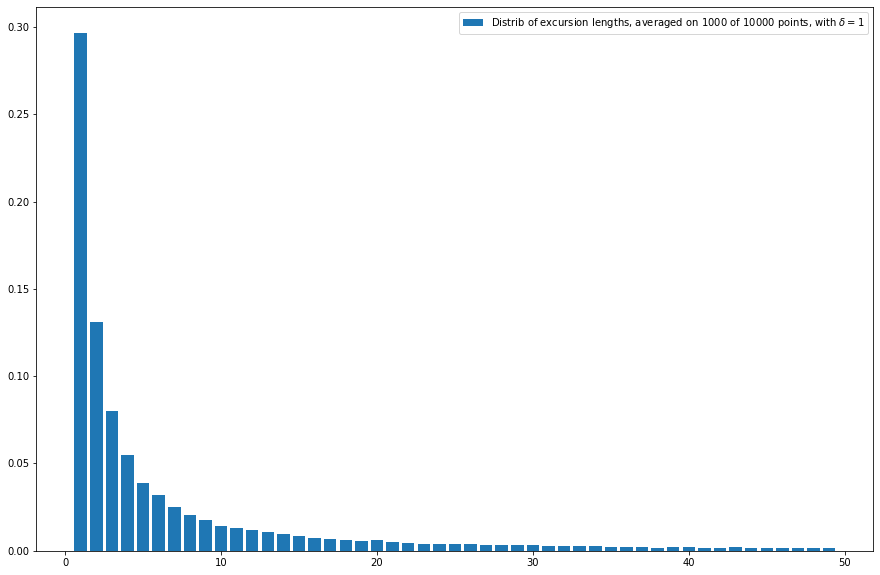

In [ ]:
delta = 1
n = 10000
n_trajs = 1000

min_cluster = 1
max_cluster = 50

len_distrib = np.zeros(n)
for i in range(n_trajs):
  traj = np.cumsum(np.random.normal(scale=1/np.sqrt(n), size=n))
  len_distrib += brownian_excursion_lengths(traj)
len_distrib /= n_trajs
len_distrib /= len_distrib.sum()


fig, ax = plt.subplots(figsize=(15,10))
ax.bar(np.arange(min_cluster,max_cluster), len_distrib[min_cluster:max_cluster], label="Distrib of excursion lengths, averaged on "+str(n_trajs)+" of "+str(n)+" points, with $\delta=$"+str(delta))
_ = plt.legend()

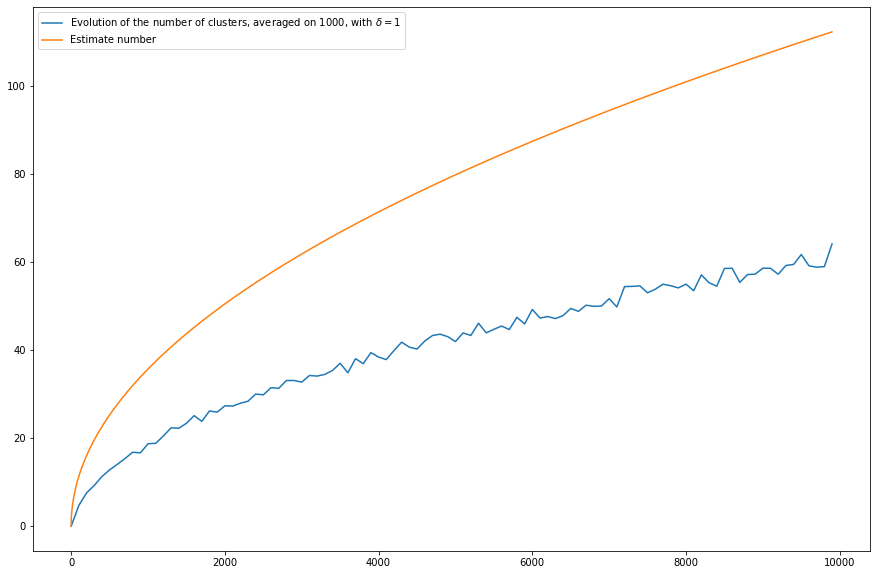

In [ ]:
delta = 1 
alpha = 1-delta/2
n_trajs = 1000
n_tab = np.arange(1,10000,100)

nb_clusters = np.zeros(len(n_tab))
for i in range(len(n_tab)):
  for j in range(n_trajs):
    n = n_tab[i]
    traj = np.cumsum(np.random.normal(scale=1/np.sqrt(n), size=n))
    nb_clusters[i] += brownian_excursion_lengths(traj).sum()
nb_clusters /= n_trajs

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.array(n_tab), nb_clusters, label="Evolution of the number of clusters, averaged on "+str(n_trajs)+", with $\delta=$"+str(delta))
ax.plot(np.arange(n_tab[-1]), np.arange(n_tab[-1])**alpha/alpha/gamma(alpha), label="Estimate number")
_ = plt.legend()

The result are better in this special case and the computation are much quicker. The average number of cluster is below the theoretical expectation. Indeed, even if working on the Brownian and not the Bessel process is easier to detect excursions, it is still a discretized trajectory: if 2 excursions of same sign are separated by a tiny area (containing 0) between to points of the grid, the all pattern will be considered as only 1 excursion, which obviously diminishes the overall number of clusters.

**Conclusion:** In this state, sampling Kingman distributions using Bessel processes is not relevant dur to numerical complexities. To make it more relevant, a different approach can be used to detect 0-hits by computing between 2 steps the probability of hitting 0, and under a probability threshold counting a hit, or refining the computation by sampling a Bessel bridge between the points for intermediate probabilities. However, this requires further analysis to analytically compute the probability to hit 0 for a Bessel bridge.